<a href="https://colab.research.google.com/github/chradam-py/chradam-py/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install astroML

     |████████████████████████████████| 112kB 6.8MB/s 
  Created wheel for astroML: filename=astroML-0.4.1-cp37-none-any.whl size=128664 sha256=4865f3b9c642b1a68ae7458eea97cf0332e89cb183c6367b65d6c4853c7ea1a0
  Stored in directory: /root/.cache/pip/wheels/7c/f2/f3/eb817cfb31b4445358dd7dda2434e02003f72801edabc38c97
Successfully built astroML


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from sklearn.decomposition import NMF, FastICA, PCA

from astroML.datasets import sdss_corrected_spectra
from astroML.utils.decorators import pickle_results


In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


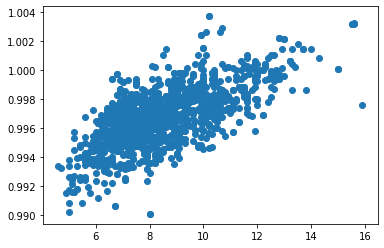

In [ ]:
plt.scatter(df['fixed acidity'], df['density'])

In [ ]:
pca=PCA(n_components=1)

In [ ]:
X=df[['citric acid','volatile acidity']]

In [ ]:
Y=X.values

In [ ]:
type(Y)


numpy.ndarray

In [ ]:
pca.fit(Y)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
Z=pca.transform(Y)

In [ ]:
pca.explained_variance_ratio_

array([0.77846039])

(array([403., 203., 316., 205., 262., 132.,  62.,  15.,   0.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

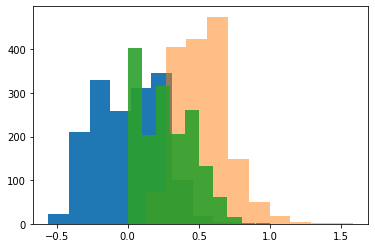

In [ ]:
plt.hist(Z)
plt.hist(Y[:,1],alpha=0.5)
plt.hist(Y[:,0],alpha=0.9)

**Ejemplo muy distinto**

In [ ]:
data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
spectra = sdss_corrected_spectra.reconstruct_spectra(data)
wavelengths = sdss_corrected_spectra.compute_wavelengths(data)


downloading PCA-processed SDSS spectra from https://github.com/astroML/astroML-data/raw/master/datasets/spec4000.npz to /root/astroML_data



In [ ]:
print(np.shape(spectra), np.shape(wavelengths))
spec_mean = spectra.mean(0)

(4000, 1000) (1000,)


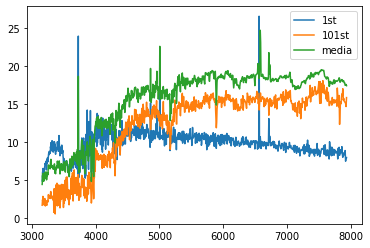

In [ ]:
plt.plot(wavelengths, spectra[0,:],label='1st')
plt.plot(wavelengths, spectra[100,:], label='101st')
plt.plot(wavelengths, spec_mean,label='media')
plt.legend()

In [ ]:
#Ejemplo de visualización de las primeras 5 componentes
n_components = 10
pca = PCA(n_components, random_state=0, svd_solver='randomized')
pca.fit(spectra)
pca_comp = np.vstack([spec_mean, pca.components_])

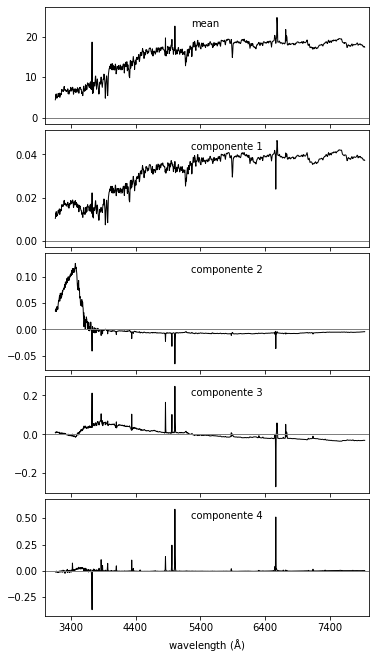

In [ ]:
fig = plt.figure(figsize=(5, 22))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05, bottom=0.1, top=0.95, hspace=0.05)
for j in range(n_components-5):
  ax = fig.add_subplot(n_components+1, 1, j+1)
  ax.xaxis.set_major_locator(plt.FixedLocator(list(range(3400, 7999, 1000))))
  ax.set_xlabel(r'wavelength ${\rm (\AA)}$')
  if j == 0:
    label = 'mean'
  else:
    label = 'componente %i' % j
  ax.plot(wavelengths, pca_comp[j], '-k', lw=1)
  xlim = [3000, 8000]
  ax.plot(xlim, [0, 0], '-', c='gray', lw=1)
  ax.text(0.45, 0.9, label, transform=ax.transAxes, ha='left', va='top')
  ylim = plt.ylim()
  dy = 0.01 * (ylim[1] - ylim[0])

  ax.set_ylim(ylim[0] - dy, ylim[1] + 5 * dy)
  ax.set_xlim(xlim)


plt.show()
